## 3.2. pseudotime 3D plot

In this notebook we make a 3D plot of the time series in pseudotime. the first 2 dimensions are the UMAP dimensions that we calculated in notebook 1.3. The 3rd dimension will be the pseudotime that we calculated in R script 3.1. If you don't want to run that script, you can also use the file `results/pseudotime/pseudotime_all_cells.csv` on the Github repository.

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings

### Load data

Here we load the dataset as filtered in Notebook 1.3 and the pseudotime as calculated in R script 3.1.

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### load pseudotime 
pseudotime_path = "../results/pseudotime/pseudotime_all_cells.csv"
pseudotime = pd.read_csv(pseudotime_path, sep=",", index_col=0)

In [4]:
### add pseudotime to dataset
adata.obs["pseudotime"] = pseudotime

In [5]:
### add pseudotemporal ordering to dataset
adata.obs["pt_ordering"] = np.argsort(np.argsort(adata.obs["pseudotime"]))

### Create 3D plots
Here, we create the 3D plots with the two UMAP dimensions and one temporal dimension

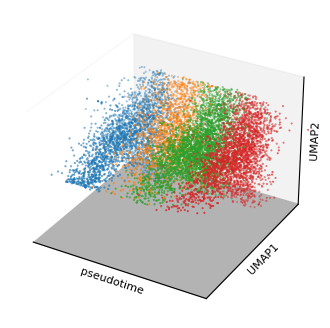

In [6]:
### create plot with pseudotime dimension

# change plot settings
plt.style.use('default')
plt.rcParams['grid.color'] = [0.5,0.5,0.5,1]
plt.rcParams['grid.linewidth'] = 2

# get values
X = np.array(adata.obs["pseudotime"])
Y = np.array(adata.obsm["X_umap"][:,0])
Z = np.array(adata.obsm["X_umap"][:,1])

# get colors matching the time
labels = adata.obs["time"].cat.categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
time_color_dict = dict(zip(labels,colors))

# get colors matching the cell types
labels = adata.obs["clusters"].cat.categories
colors = adata.uns["clusters_colors"]
cluster_color_dict = dict(zip(labels,colors))

# create plot
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=1, marker=".", 
           c=adata.obs["time"].map(time_color_dict))

# add labels
ax.set_xlabel('pseudotime', fontsize=8, labelpad=-15)
ax.set_ylabel('UMAP1', fontsize=8, labelpad=-15)
ax.set_zlabel('UMAP2', fontsize=8, labelpad=-15)

# remove ticks
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_zticks([])
ax.set_zticklabels([])

# adjust the min and max of pseudotime axis
ax.set_xlim((-2.5,2))

# set colors background planes
ax.w_zaxis.set_pane_color((0.7,0.7,0.7,1))
ax.xaxis.pane.fill = False

# save figure
save_path = "../figures/3.2.pseudotime_3D-plot.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
save_path = "../figures/3.2.pseudotime_3D-plot.png"
fig.savefig(save_path, bbox_inches='tight', format='png', dpi=300)

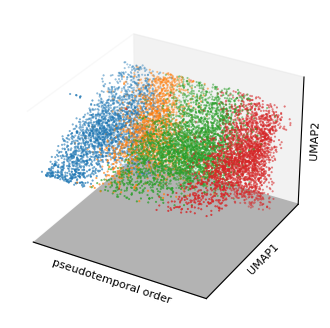

In [7]:
### create plot with pseudotemporal order as dimension

# change plot settings
plt.style.use('default')
plt.rcParams['grid.color'] = [0.5,0.5,0.5,1]
plt.rcParams['grid.linewidth'] = 2

# get values
X = np.array(adata.obs["pt_ordering"])
Y = np.array(adata.obsm["X_umap"][:,0])
Z = np.array(adata.obsm["X_umap"][:,1])

# get colors matching the time
labels = adata.obs["time"].cat.categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
time_color_dict = dict(zip(labels,colors))

# get colors matching the cell types
labels = adata.obs["clusters"].cat.categories
colors = adata.uns["clusters_colors"]
cluster_color_dict = dict(zip(labels,colors))

# create plot
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=1, marker=".", 
           c=adata.obs["time"].map(time_color_dict))

# add labels
ax.set_xlabel('pseudotemporal order', fontsize=8, labelpad=-15)
ax.set_ylabel('UMAP1', fontsize=8, labelpad=-15)
ax.set_zlabel('UMAP2', fontsize=8, labelpad=-15)

# remove ticks
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_zticks([])
ax.set_zticklabels([])

# adjust the min and max of pseudotime axis
ax.set_xlim((0,10000))

# set colors background planes
ax.w_zaxis.set_pane_color((0.7,0.7,0.7,1))
ax.xaxis.pane.fill = False

# save figure
save_path = "../figures/3.2.pt-order_3D-plot.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
save_path = "../figures/3.2.pt-order_3D-plot.png"
fig.savefig(save_path, bbox_inches='tight', format='png', dpi=300)

In [8]:
### convert timepoints (control, 3h, 24, 72h) to integers (0,1,2,3)
str_to_int = {
    "control": 0,
    "3h":1,
    "24h":2,
    "72h":3,
}
adata.obs['exp_time'] = (adata.obs['time'].map(str_to_int).astype('category'))

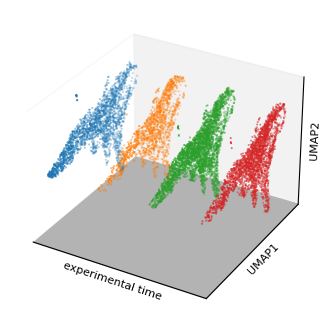

In [9]:
### create plot with experimental time as dimension

# change plot settings
plt.style.use('default')
plt.rcParams['grid.color'] = [0.5,0.5,0.5,1]
plt.rcParams['grid.linewidth'] = 2

# get values
X = np.array(adata.obs["exp_time"])
Y = np.array(adata.obsm["X_umap"][:,0])
Z = np.array(adata.obsm["X_umap"][:,1])

# get colors matching the time
labels = adata.obs["time"].cat.categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
time_color_dict = dict(zip(labels,colors))

# get colors matching the cell types
labels = adata.obs["clusters"].cat.categories
colors = adata.uns["clusters_colors"]
cluster_color_dict = dict(zip(labels,colors))

# create plot
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=0.5, marker=".", 
           c=adata.obs["time"].map(time_color_dict))

# add labels
ax.set_xlabel('experimental time', fontsize=8, labelpad=-15)
ax.set_ylabel('UMAP1', fontsize=8, labelpad=-15)
ax.set_zlabel('UMAP2', fontsize=8, labelpad=-15)

# remove ticks
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_zticks([])
ax.set_zticklabels([])

# set colors background planes
ax.w_zaxis.set_pane_color((0.7,0.7,0.7,1))
ax.xaxis.pane.fill = False

# save figure
save_path = "../figures/3.2.experimental-time_expression_3D-plot.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
save_path = "../figures/3.2.experimental-time_expression_3D-plot.png"
fig.savefig(save_path, bbox_inches='tight', format='png', dpi=300)